## Alzheime image dataset in google drive
https://drive.google.com/drive/folders/1BM7i7OU4pHrukjwFYiMMQL0WyNlAlK0q?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# set up path
base_path = '/content/gdrive/MyDrive/Colab Notebooks/final project/Alzheimer Dataset (OASIS)'

moderate_demented_path = os.path.join(base_path, 'Moderate_Demented')
mild_demented_path = os.path.join(base_path, 'Mild_Demented')
very_mild_demented_path = os.path.join(base_path, 'Very_Mild_Demented')
# non_demented_path = os.path.join(base_path, 'Non Demented')

In [3]:
# (Test) Image paths
image_paths = [os.path.join(very_mild_demented_path, filename) for filename in os.listdir(very_mild_demented_path) if filename.endswith(".jpg")]

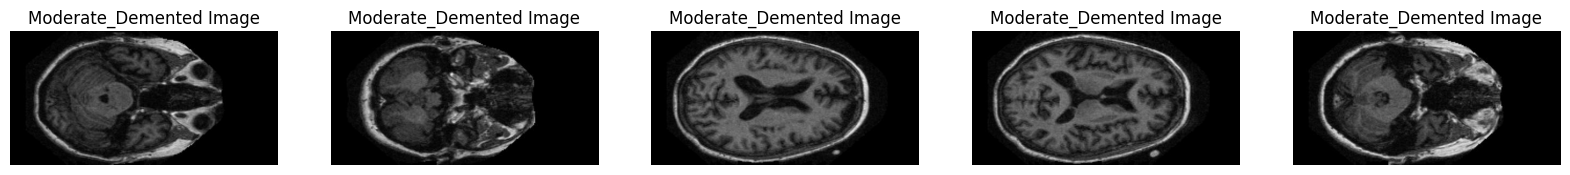

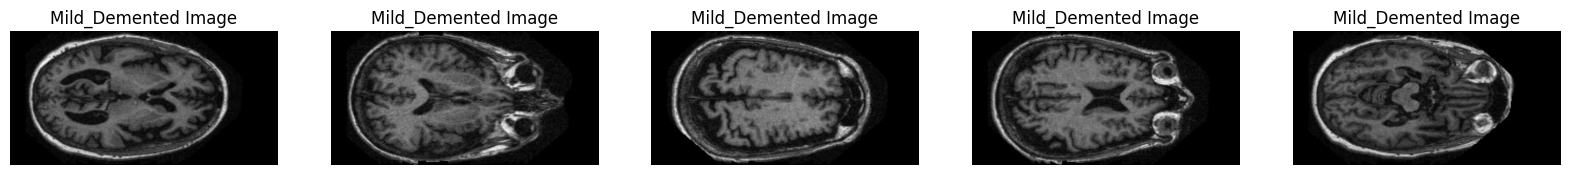

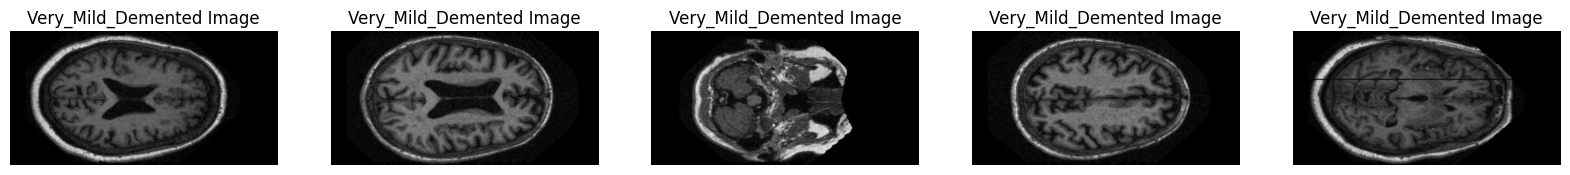

In [4]:
# Visualize images with titles for different classes
# classes = ["Moderate_Demented", "Mild_Demented", "Very_Mild_Demented", "Non_Demented"]
classes = ["Moderate_Demented", "Mild_Demented", "Very_Mild_Demented"]

for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    image_paths = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith(".jpg")]

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, img_path in enumerate(image_paths[:5]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"{class_name} Image", fontsize= 12)

    plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# Function to load and preprocess images
def load_images(image_paths, label):
    images = []
    labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))  # Resize to a common size
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

In [7]:
# Load images for each class
X_moderate_demented, y_moderate_demented = load_images([os.path.join(moderate_demented_path, filename) for filename in os.listdir(moderate_demented_path) if filename.endswith(".jpg")], 'Moderate_Demented')
X_mild_demented, y_mild_demented = load_images([os.path.join(mild_demented_path, filename) for filename in os.listdir(mild_demented_path) if filename.endswith(".jpg")], 'Mild_Demented')
X_very_mild_demented, y_very_mild_demented = load_images([os.path.join(very_mild_demented_path, filename) for filename in os.listdir(very_mild_demented_path) if filename.endswith(".jpg")], 'Very_Mild_Demented')
# X_non_demented, y_non_demented = load_images([os.path.join(non_demented_path, filename) for filename in os.listdir(non_demented_path) if filename.endswith(".jpg")], 'Non_Demented')

In [8]:
# Concatenate data from all classes
# X = np.concatenate([X_moderate_demented, X_mild_demented, X_very_mild_demented, X_non_demented])
# y = np.concatenate([y_moderate_demented, y_mild_demented, y_very_mild_demented, y_non_demented])
X = np.concatenate([X_moderate_demented, X_mild_demented, X_very_mild_demented])
y = np.concatenate([y_moderate_demented, y_mild_demented, y_very_mild_demented])

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6, shuffle= True,random_state=42, stratify=y)

In [10]:
# One-hot encode the labels
le = LabelEncoder()
# y_train_encoded = to_categorical(le.fit_transform(y_train))
# y_test_encoded = to_categorical(le.transform(y_test))
y_train_encoded = to_categorical(le.fit_transform(y_train), num_classes=3)
y_test_encoded = to_categorical(le.transform(y_test), num_classes=3)

In [11]:
# Check the classes
classes = le.classes_
print("Encoded Classes:", classes)

Encoded Classes: ['Mild_Demented' 'Moderate_Demented' 'Very_Mild_Demented']


In [17]:
# (method 1) Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # layers.Dense(4, activation='softmax')  # 4 classes: Moderate_Demented, Mild_Demented, Very_Mild_Demented, Non_Demented
    layers.Dense(3, activation='softmax')  # 3 classes: Moderate_Demented, Mild_Demented, Non_Demented
])
# Check the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [21]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=10, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/10
481/481 [==============================] - 149s 303ms/step - loss: 5.2713 - accuracy: 0.7070 - val_loss: 0.6711 - val_accuracy: 0.7158
Epoch 2/10
481/481 [==============================] - 146s 303ms/step - loss: 0.6615 - accuracy: 0.7158 - val_loss: 0.6444 - val_accuracy: 0.7260
Epoch 3/10
481/481 [==============================] - 144s 299ms/step - loss: 0.6482 - accuracy: 0.7237 - val_loss: 0.6400 - val_accuracy: 0.7270
Epoch 4/10
481/481 [==============================] - 143s 297ms/step - loss: 0.6543 - accuracy: 0.7278 - val_loss: 0.6267 - val_accuracy: 0.7408
Epoch 5/10
481/481 [==============================] - 144s 299ms/step - loss: 0.6387 - accuracy: 0.7303 - val_loss: 0.6392 - val_accuracy: 0.7086
Epoch 6/10
481/481 [==============================] - 143s 297ms/step - loss: 0.6358 - accuracy: 0.7330 - val_loss: 0.6427 - val_accuracy: 0.7119
Epoch 7/10
481/481 [==============================] - 144s 300ms/step - loss: 0.6346 - accuracy: 0.7316 - val_loss: 0.6272 -

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

121/121 [==============================] - 1s 12ms/step - loss: 0.6267 - accuracy: 0.7408
Test Accuracy: 74.08%


In [23]:
# Export our model to HDF5 file
model.save("Alzheimer(OASIS)ThreeCategories.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
